# Additional Exercises

Alberto Quaini

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 7

In [4]:
indi = pd.read_csv('indi.csv', parse_dates=True, index_col='DATE')
pitt = pd.read_csv('pitt.csv', parse_dates=True, index_col='DATE')
chic = pd.read_csv('chic.csv', parse_dates=True, index_col='DATE')
wash = pd.read_csv('wash.csv', parse_dates=True, index_col='DATE')
miam = pd.read_csv('miam.csv', parse_dates=True, index_col='DATE')

In [5]:
life = pd.concat([indi, pitt, chic, wash, miam]).sort_index()
life['date'] = life.index.copy()
life['color'] = 'black'
life.loc[(life.index == '1975/01/22') | (life.index == '1988/07/14'), 'color'] = 'yellow'
life.loc[(life.index >= '2006/06/03') & (life.index <= '2016/10/31'), 'color'] = 'maroon'
life.index = life.index.dayofyear

## Exercise 8

In [3]:
lipids = pd.read_csv('lipids.csv', skiprows=4)
lipids = lipids[lipids['diseased'] == 1]
lipids.head()

,diseased,chol,trig
51,1,184,145
52,1,263,142
53,1,185,115
54,1,271,128
55,1,173,56


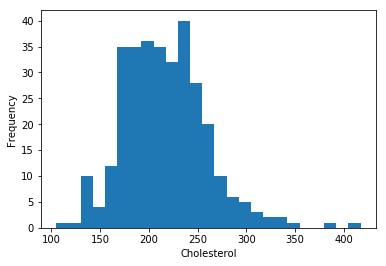

Midpoint of bin with highest frequency:  236.04


In [5]:
fig, ax = plt.subplots()
counts, bins, _ = plt.hist(lipids["chol"], bins=25)
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()
plt.savefig('images/chol_hist.png')

midpoint = bins[[counts.argmax(), counts.argmax() + 1]].mean()
print("Midpoint of bin with highest frequency: ", round(midpoint, 4))

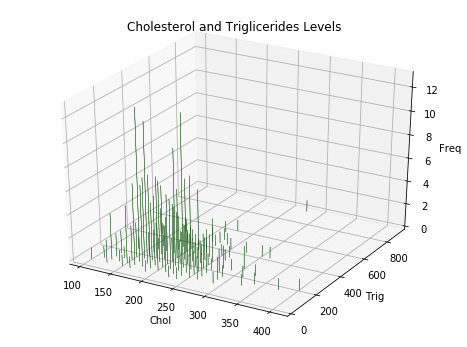

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
hist, xs, ys = np.histogram2d(lipids['chol'], lipids['trig'], bins=25)

xpos, ypos = np.meshgrid(xs[:-1] + 0.3, ys[:-1] + 0.3)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g')

ax.set_xlabel('Chol')
ax.set_ylabel('Trig')
ax.set_zlabel('Freq')

plt.title('Cholesterol and Triglicerides Levels')
plt.savefig('images/chol_3d_hist.png')
plt.show()

plt.show()


It seems that cholesterol and trigliceride are correlated and people with cholesterol $>= 150$ and trigliceride $>= 200$ are likely to haave heart disease.